In [17]:
import keras
from keras import layers

encoding_dim = 32

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2767 - val_loss: 0.1947
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1735 - val_loss: 0.1546
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1451 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1289 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1183 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1110 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1057 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1020 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0992 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0973 - val_loss: 0.0954

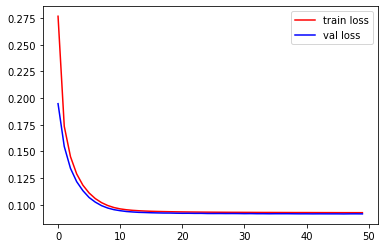

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(50)

import matplotlib.pyplot as plt
plt.plot(epochs,loss,'r',label='train loss')
plt.plot(epochs,val_loss,'b',label='val loss')
plt.legend()

In [22]:
reconstruc_imgs = autoencoder.predict(x_test)

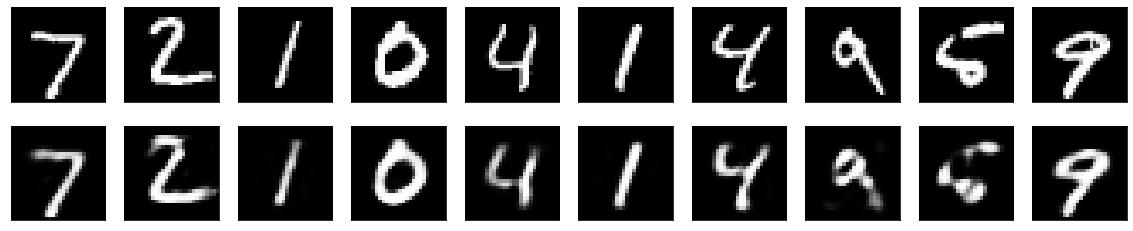

In [23]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstruc_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
conv_encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
conv_decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
conv_autoencoder = keras.Model(input_img, conv_decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [25]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [26]:
history = conv_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 34s 73ms/step - loss: 0.2044 - val_loss: 0.1468
Epoch 2/50
469/469 [==============================] - 34s 73ms/step - loss: 0.1362 - val_loss: 0.1264
Epoch 3/50
469/469 [==============================] - 35s 75ms/step - loss: 0.1224 - val_loss: 0.1172
Epoch 4/50
469/469 [==============================] - 37s 79ms/step - loss: 0.1158 - val_loss: 0.1121
Epoch 5/50
469/469 [==============================] - 38s 80ms/step - loss: 0.1117 - val_loss: 0.1090
Epoch 6/50
469/469 [==============================] - 38s 81ms/step - loss: 0.1089 - val_loss: 0.1064
Epoch 7/50
469/469 [==============================] - 38s 80ms/step - loss: 0.1067 - val_loss: 0.1045
Epoch 8/50
469/469 [==============================] - 37s 80ms/step - loss: 0.1049 - val_loss: 0.1033
Epoch 9/50
469/469 [==============================] - 40s 85ms/step - loss: 0.1035 - val_loss: 0.1016
Epoch 10/50
469/469 [==============================] - 37s 79ms/step - loss: 0.102

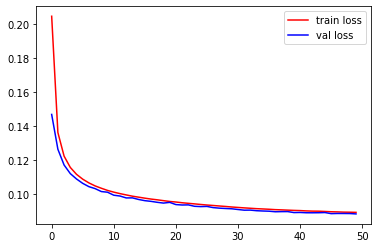

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(50)

import matplotlib.pyplot as plt
plt.plot(epochs,loss,'r',label='train loss')
plt.plot(epochs,val_loss,'b',label='val loss')
plt.legend()

In [28]:
reconstruc_imgs = conv_autoencoder.predict(x_test)

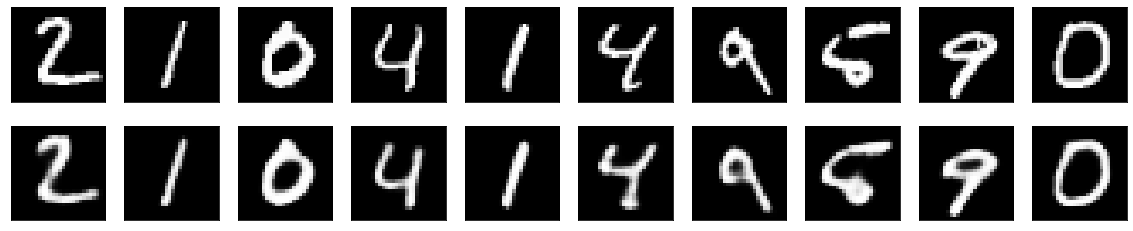

In [29]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(reconstruc_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()